# Global Power Plant Database


### Problem Statement:


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [72]:
powrDF = pd.read_csv('PowePlanat_India.csv')
powrDF


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
powrDF.shape


(908, 25)

### Feature column data type indicates that feature data are a mix of continuous and categorical data ,while target / label (' Primary Fuel ') data type indicates that dependent variable data is categorical in nature and target / label 'capacity_mw' data type indicates that dependent variable data is continuous in nature.


In [74]:
powrDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

## Checking for unique elements


In [75]:
powrDF.nunique()


country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

##  Checking for Null values


In [76]:
powrDF.isnull().sum()


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

## Statistical Summary


In [77]:
powrDF.dtypes


country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [78]:
powrDF.describe()


,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [79]:
powrDF.latitude.isnull().sum()/908*100


5.066079295154185

In [80]:
powrDF.longitude.isnull().sum()/908*100


5.066079295154185

In [81]:
powrDF.geolocation_source.isnull().sum()/908*100


2.092511013215859

In [82]:
powrDF.other_fuel1.isnull().sum()/908*100


78.08370044052863

In [83]:
powrDF.other_fuel2.isnull().sum()/908*100


99.8898678414097

In [84]:
powrDF.other_fuel3.isnull().sum()/908*100


100.0

In [85]:
powrDF.commissioning_year.isnull().sum()/908*100


41.85022026431718

In [86]:
powrDF.owner.isnull().sum()/908*100


62.33480176211453

In [87]:
powrDF.wepp_id.isnull().sum()/908*100


100.0

In [88]:
powrDF.estimated_generation_gwh.isnull().sum()/908*100


100.0

In [89]:
powrDF.year_of_capacity_data.isnull().sum()/908*100


42.731277533039645

In [90]:
powrDF.generation_gwh_2013.isnull().sum()/908*100


57.70925110132159

In [91]:
powrDF.generation_gwh_2014.isnull().sum()/908*100


55.837004405286336

In [92]:
powrDF.generation_gwh_2015.isnull().sum()/908*100


53.19383259911894

In [93]:
powrDF.generation_gwh_2016.isnull().sum()/908*100


51.87224669603524

In [94]:
powrDF.generation_gwh_2017.isnull().sum()/908*100


51.2114537444934

#### dropping columns estimated_generation_gwh,wepp_id,owner,other_fuel3,other_fuel2,other_fuel1 since they contain insufficient amount of data.


In [95]:
powrDF.drop(columns=['estimated_generation_gwh','wepp_id','owner','other_fuel3','other_fuel2','other_fuel1'],inplace=True)


In [97]:
powrDF


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### dropping columns url,country,country_long ,name, gppd_idnr since they don't contribute to building a good model for predicting the target variable values.


In [98]:
powrDF.drop(columns=['country','country_long','name','gppd_idnr','url'],inplace=True)


In [99]:
powrDF


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
powrDF.dtypes[powrDF.dtypes == 'object'] #Identifying the Categorical Columns


primary_fuel              object
source                    object
geolocation_source        object
generation_data_source    object
dtype: object

In [101]:
powrDF.source.value_counts()


Central Electricity Authority                                  520
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [102]:
powrDF.generation_data_source.value_counts()


Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [103]:
powrDF.geolocation_source.value_counts()


WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [104]:
powrDF.drop(columns=['generation_data_source','source'],inplace=True)


In [105]:
powrDF


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,Solar,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for unique categories in the categorical columns with null values


In [106]:
powrDF.dtypes[powrDF.dtypes == 'object'] #Identifying the Categorical Columns


primary_fuel          object
geolocation_source    object
dtype: object

In [107]:
powrDF.geolocation_source.isnull().sum()


19

In [108]:
powrDF.geolocation_source.unique()


array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [110]:
powrDF.geolocation_source.isnull().sum()/908*100


2.092511013215859

In [111]:
powrDF.geolocation_source.mode() # most frequently occuring value.


0    WRI
Name: geolocation_source, dtype: object

In [112]:
(powrDF['geolocation_source'] == 'WRI').sum()/powrDF.geolocation_source.count()*100 #checking the % share of most frequently occuring value.


86.16422947131609

### Therefore imputing ' WRI' to NaN values in geolocation_source column


In [113]:
from sklearn.impute import SimpleImputer


In [114]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )


In [115]:
si = si.fit(powrDF[['geolocation_source']])


In [116]:
powrDF[['geolocation_source']] = si.transform(powrDF[['geolocation_source']])


In [117]:
powrDF[['geolocation_source']].isnull().sum()


geolocation_source    0
dtype: int64

In [118]:
powrDF.select_dtypes(exclude = object).isnull().sum()


capacity_mw                0
latitude                  46
longitude                 46
commissioning_year       380
year_of_capacity_data    388
generation_gwh_2013      524
generation_gwh_2014      507
generation_gwh_2015      483
generation_gwh_2016      471
generation_gwh_2017      465
dtype: int64

In [119]:
powrDF.latitude


0      28.1839
1      24.7663
2      21.9038
3      23.8712
4      21.9603
        ...   
903    16.2949
904    12.8932
905    15.2758
906    24.3500
907     9.9344
Name: latitude, Length: 908, dtype: float64

In [120]:
powrDF.longitude


0      73.2407
1      74.6090
2      69.3732
3      91.3602
4      82.4091
        ...   
903    77.3568
904    78.1654
905    75.5811
906    73.7477
907    77.4768
Name: longitude, Length: 908, dtype: float64

## Using KNN Imputation technique for imputing missing data.


In [121]:
from sklearn.impute import KNNImputer


In [122]:
imp = KNNImputer(n_neighbors=2)


In [123]:
powrDF[['latitude','longitude']] = imp.fit_transform(powrDF[['latitude','longitude']])


In [124]:
powrDF[['latitude','longitude']].isnull().sum()


latitude     0
longitude    0
dtype: int64

#### There are no more values missing from 'latitude' and 'longitude' columns.


In [125]:
powrDF.commissioning_year.isnull().sum()/908*100


41.85022026431718

In [126]:
powrDF.commissioning_year.mode()


0    2013.0
Name: commissioning_year, dtype: float64

In [127]:
powrDF.commissioning_year.mode()


0    2013.0
Name: commissioning_year, dtype: float64

In [128]:
(powrDF['commissioning_year'] == 2013.0).sum()/powrDF.commissioning_year.count()*100 #checking the % share of most frequently occuring value.


5.303030303030303

In [129]:
powrDF.commissioning_year.mean()


1996.876893939394

In [130]:
powrDF.commissioning_year.median()


2000.0

In [131]:
(powrDF['commissioning_year'] == 1996.0).sum()/powrDF.commissioning_year.count()*100 #checking the % share of mean year value.


2.462121212121212

In [132]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['commissioning_year']])
powrDF[['commissioning_year']] = si.transform(powrDF[['commissioning_year']])
powrDF[['commissioning_year']].isnull().sum()


commissioning_year    0
dtype: int64

In [133]:
powrDF.commissioning_year = powrDF.commissioning_year.astype('int64') #converting to int data type.


In [134]:
powrDF.commissioning_year


0      2011
1      2000
2      2000
3      2004
4      2015
       ... 
903    2016
904    2000
905    2000
906    2000
907    2000
Name: commissioning_year, Length: 908, dtype: int64

In [135]:
powrDF.year_of_capacity_data.value_counts()


2018.0    520
Name: year_of_capacity_data, dtype: int64

#### Dropping column year_of_capacity_data as all the values in it are '2018.0'


In [136]:
powrDF.drop(columns = 'year_of_capacity_data',inplace = True)


In [137]:
powrDF.shape


(908, 11)

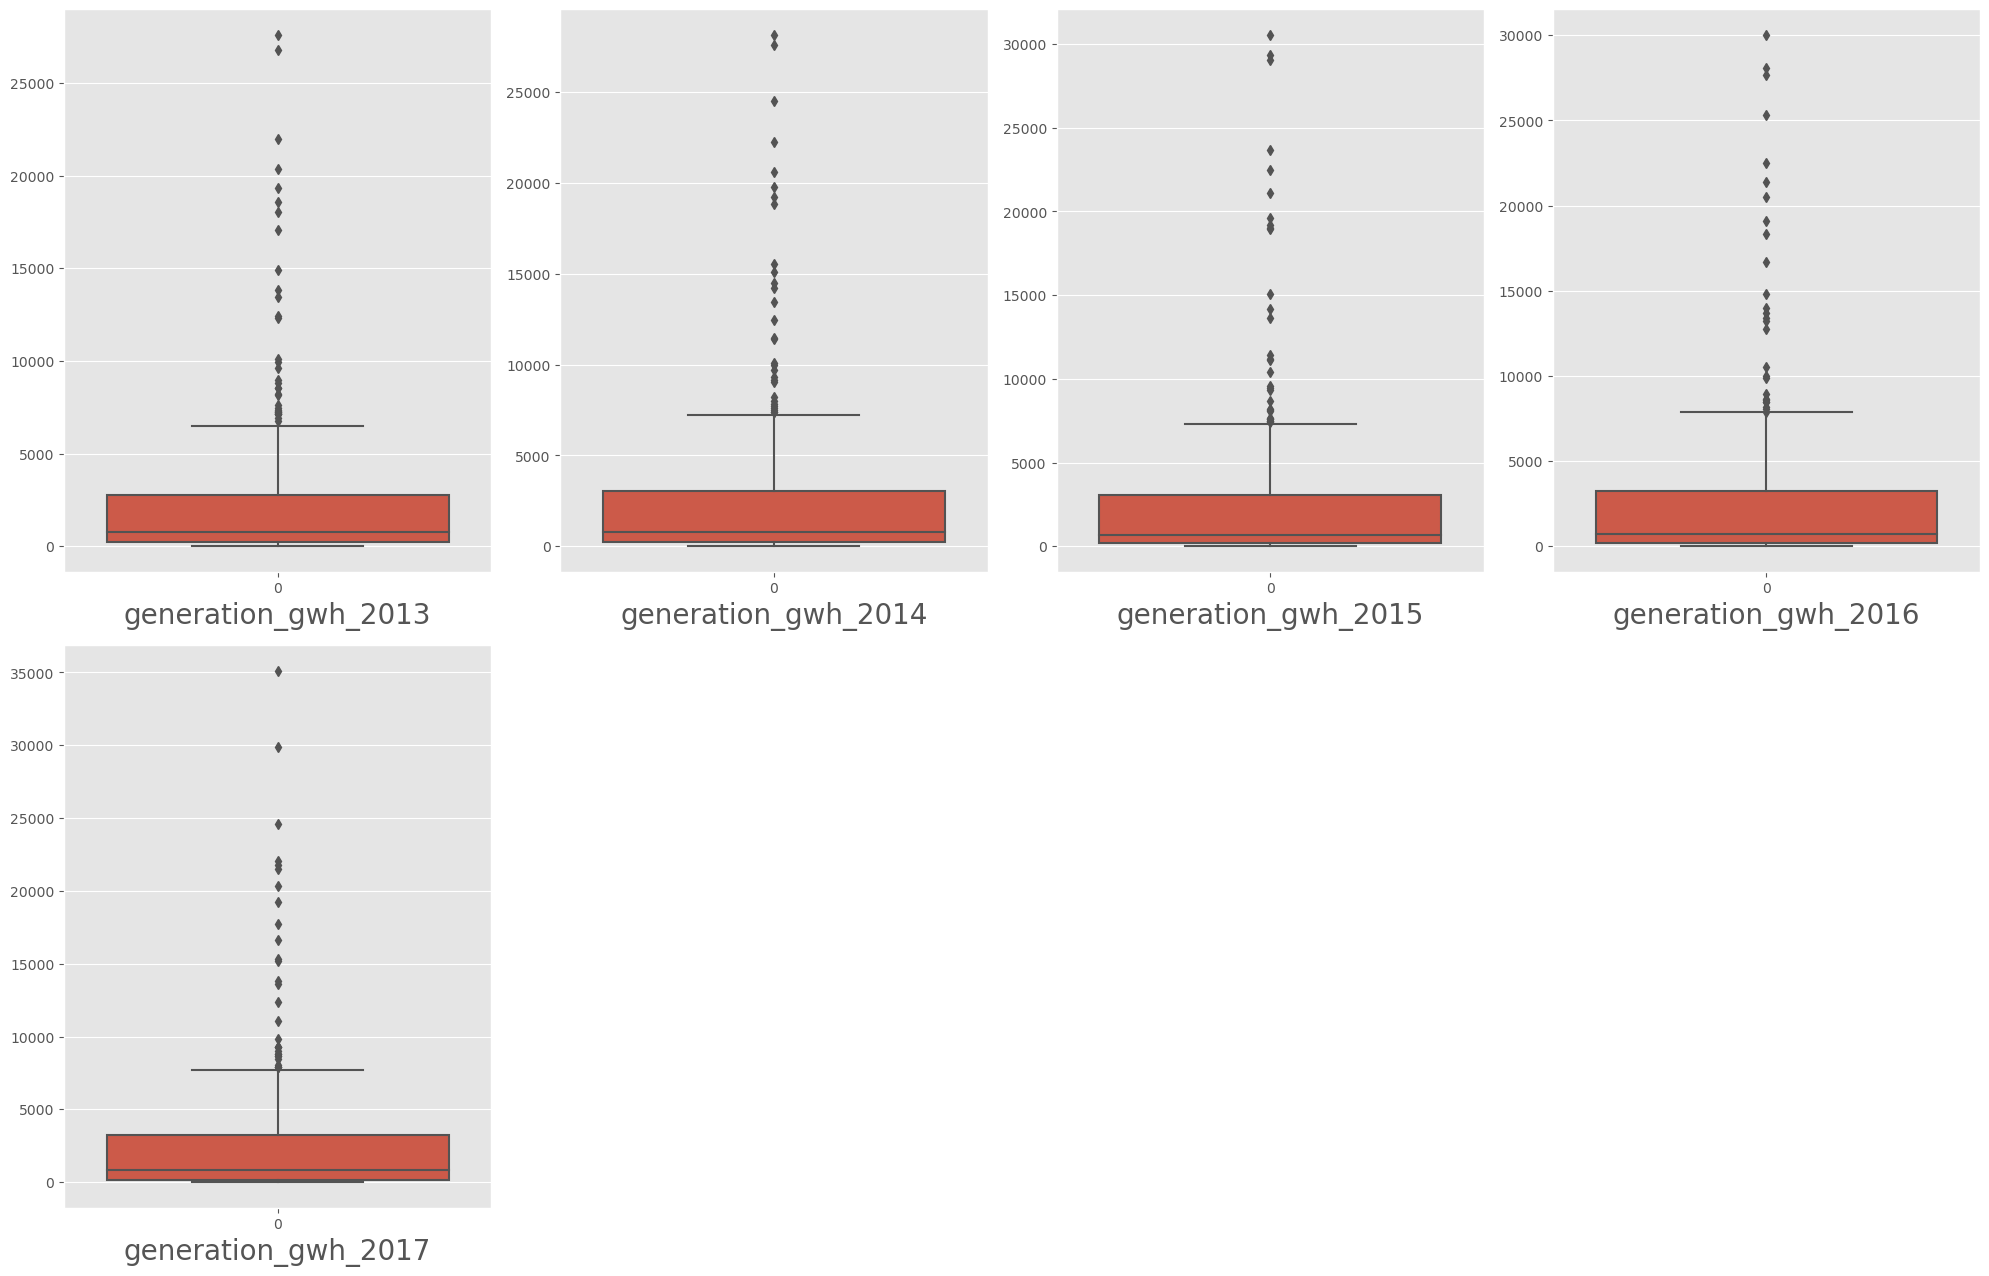

In [138]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source','latitude','longitude','commissioning_year',])
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()


In [139]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2013']])
powrDF[['generation_gwh_2013']] = si.transform(powrDF[['generation_gwh_2013']])
powrDF[['generation_gwh_2013']].isnull().sum()


generation_gwh_2013    0
dtype: int64

In [140]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2014']])
powrDF[['generation_gwh_2014']] = si.transform(powrDF[['generation_gwh_2014']])
powrDF[['generation_gwh_2014']].isnull().sum()


generation_gwh_2014    0
dtype: int64

In [141]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2015']])
powrDF[['generation_gwh_2015']] = si.transform(powrDF[['generation_gwh_2015']])
powrDF[['generation_gwh_2015']].isnull().sum()


generation_gwh_2015    0
dtype: int64

In [142]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2016']])
powrDF[['generation_gwh_2016']] = si.transform(powrDF[['generation_gwh_2016']])
powrDF[['generation_gwh_2016']].isnull().sum()


generation_gwh_2016    0
dtype: int64

In [143]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2017']])
powrDF[['generation_gwh_2017']] = si.transform(powrDF[['generation_gwh_2017']])
powrDF[['generation_gwh_2017']].isnull().sum()


generation_gwh_2017    0
dtype: int64

In [144]:
powrDF.isnull().sum()


capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

###  There are no more null values in the dataframe.


In [145]:
powrDF['Age'] = powrDF['commissioning_year'].apply(lambda y: 2021 - y)


In [146]:
powrDF.drop(columns=['commissioning_year'],inplace=True)


In [147]:
powrDF


,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,797.063475,805.760000,701.027250,716.728350,807.601700,10
1,98.0,24.7663,74.6090,Coal,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,21
2,39.2,21.9038,69.3732,Wind,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,21
3,135.0,23.8712,91.3602,Gas,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,17
4,1800.0,21.9603,82.4091,Coal,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,6
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,WRI,797.063475,805.760000,0.994875,233.596650,865.400000,5
904,3.0,12.8932,78.1654,Solar,Industry About,797.063475,805.760000,701.027250,716.728350,807.601700,21
905,25.5,15.2758,75.5811,Wind,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,21
906,80.0,24.3500,73.7477,Coal,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,21


## Analysing the continuous data type Target column


In [148]:
powrDF.capacity_mw


0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 908, dtype: float64

<Axes: xlabel='capacity_mw', ylabel='Density'>

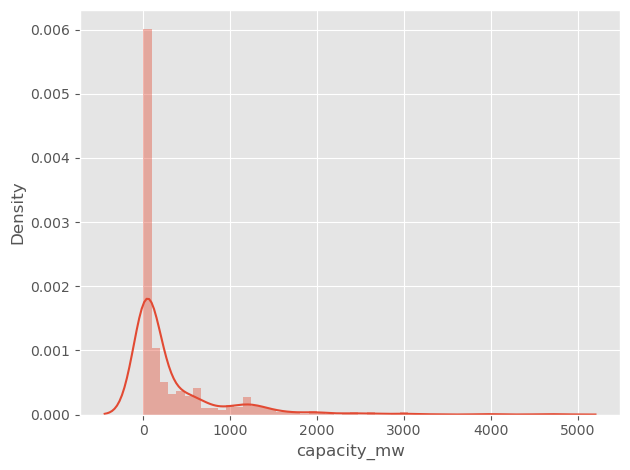

In [149]:
sns.distplot(powrDF.capacity_mw)


In [150]:
powrDF.select_dtypes(include = object).isnull().sum()


primary_fuel          0
geolocation_source    0
dtype: int64

In [151]:
powrDF.capacity_mw.skew()


3.1932573023446458

## Analysing Feature columns with Continuous Data.


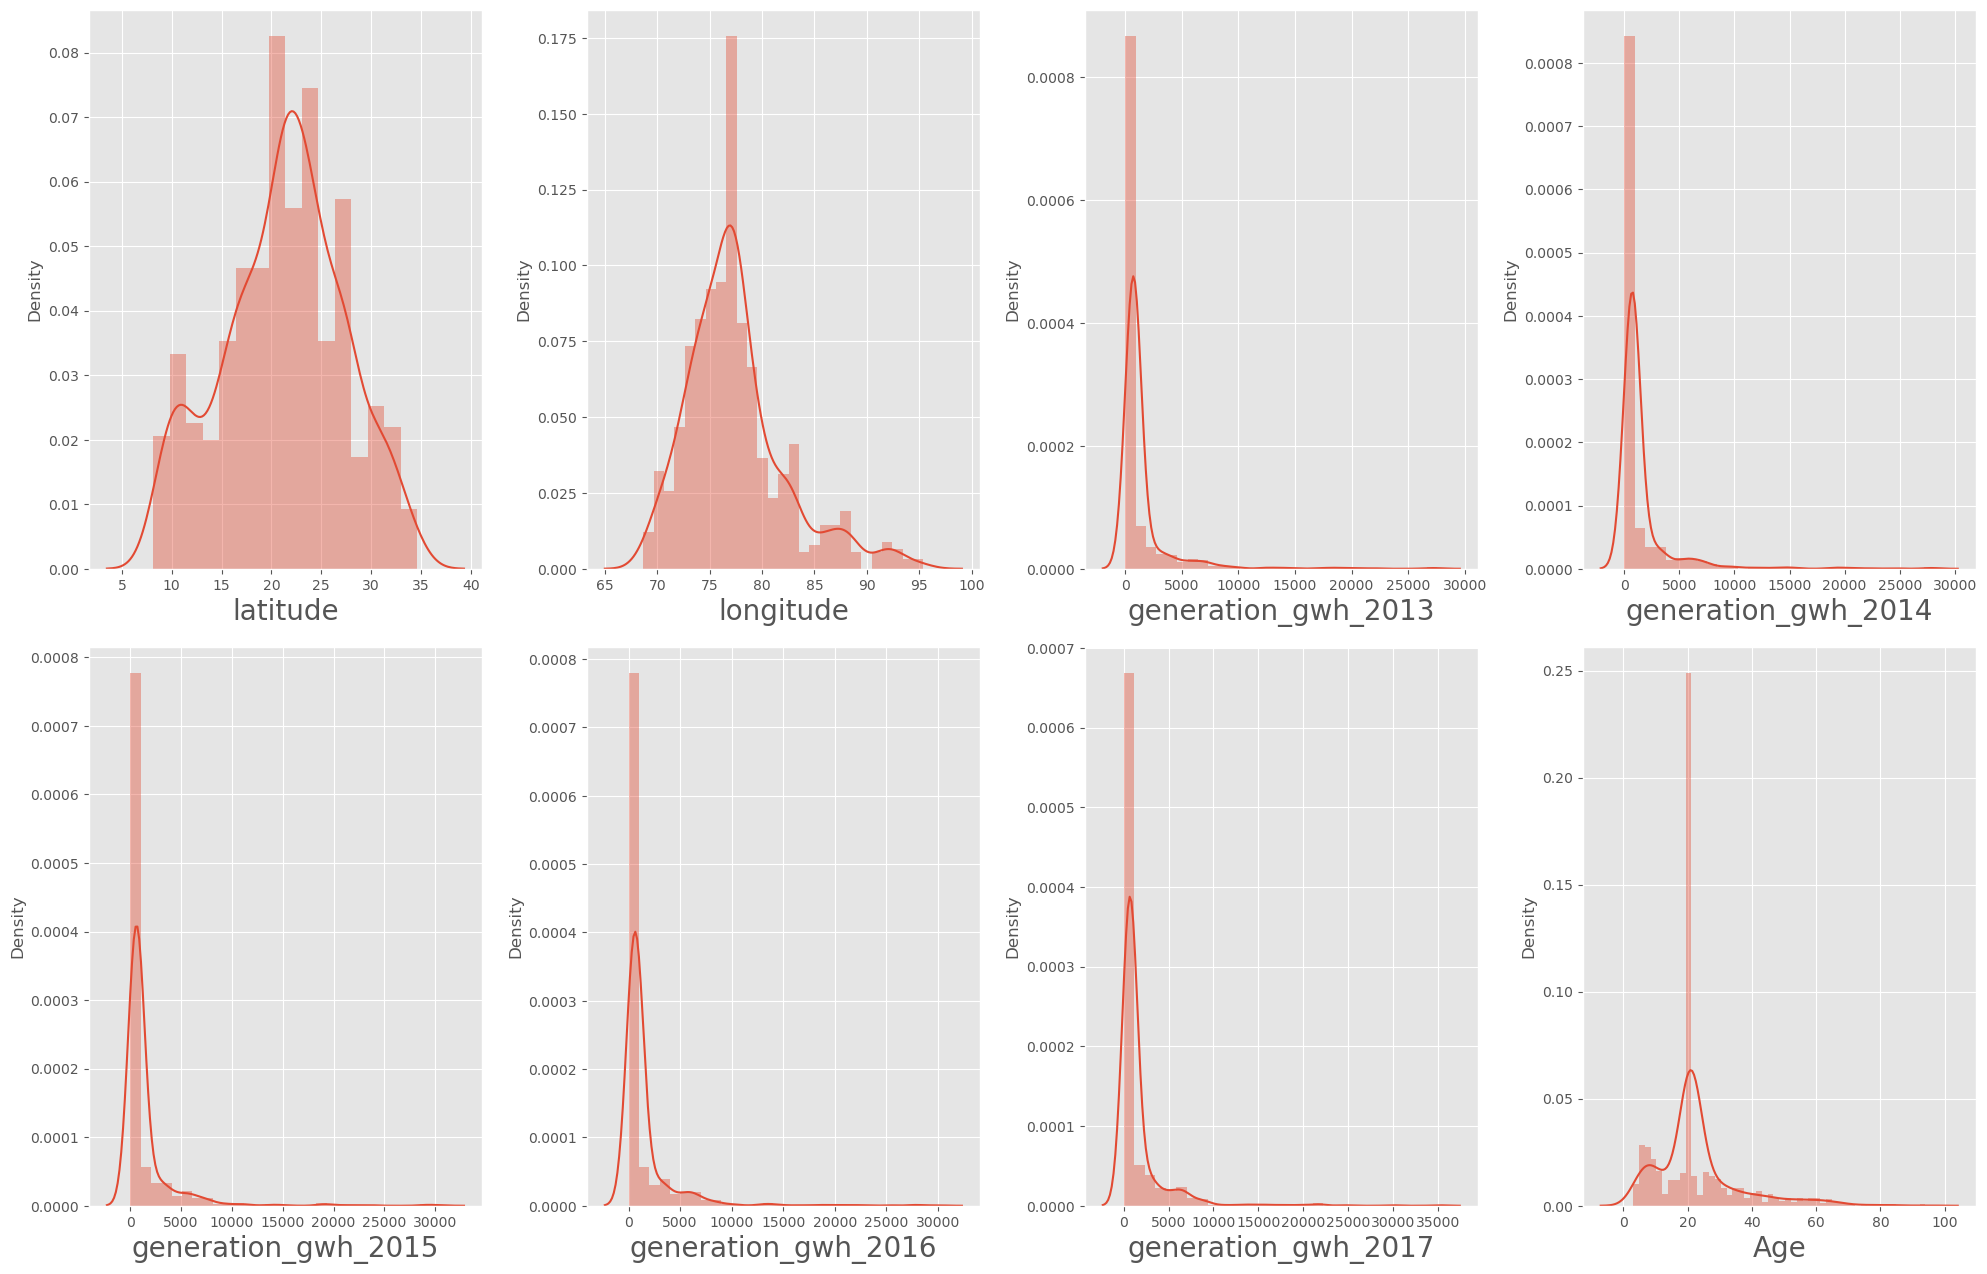

In [152]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']):
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(powrDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()


data distributuions are skewed



### capacity_mw vs continuous / discrete data type columns


<Figure size 600x600 with 0 Axes>

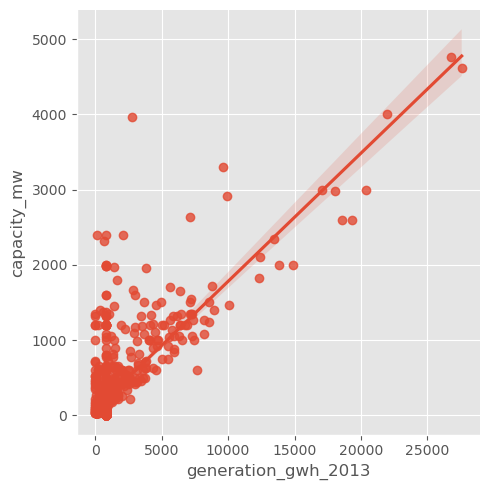

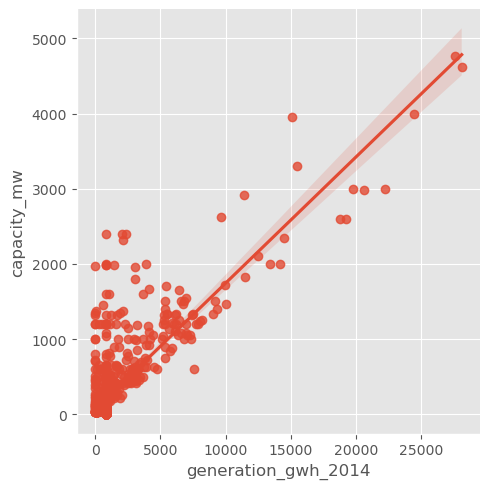

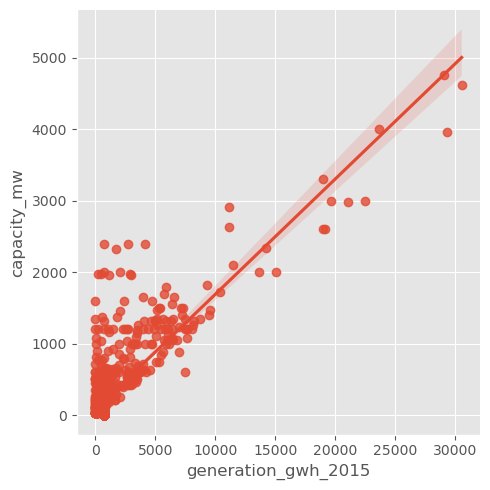

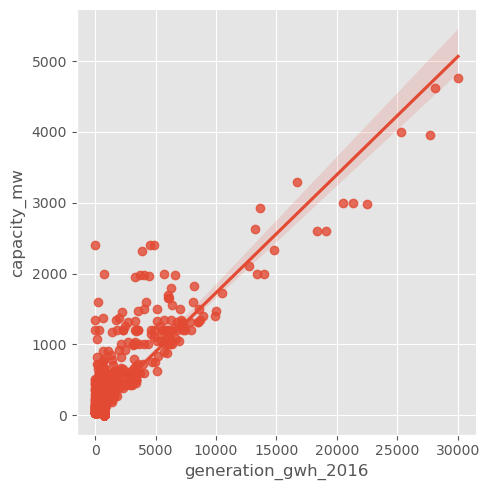

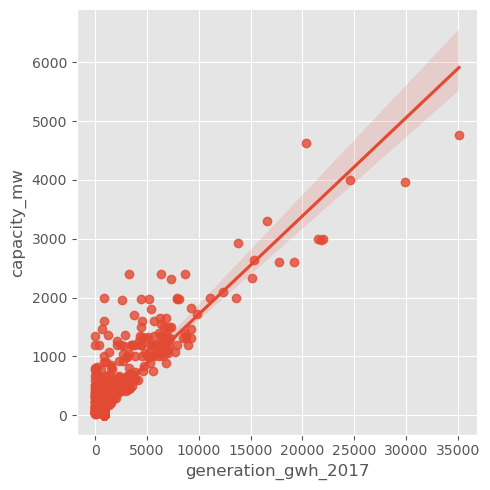

In [154]:
plt.figure(figsize=(6,6),facecolor='white')
X = ['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
for col in X:
    sns.lmplot(x = col,y = 'capacity_mw',data = powrDF)


## Analysing the categorical data type Target column


In [156]:
powrDF.primary_fuel.unique()


array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [158]:
powrDF.primary_fuel.value_counts()


Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

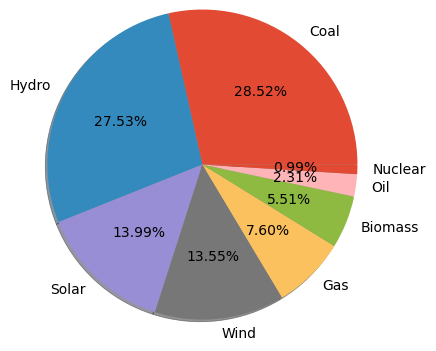

In [159]:
labels = 'Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear'
fig, ax = plt.subplots()
ax.pie(powrDF['primary_fuel'].value_counts(),labels = labels,radius =2,autopct = '%1.2f%%', shadow=True,)
plt.show()


### Checking for Outliers in columns with continuous distribution


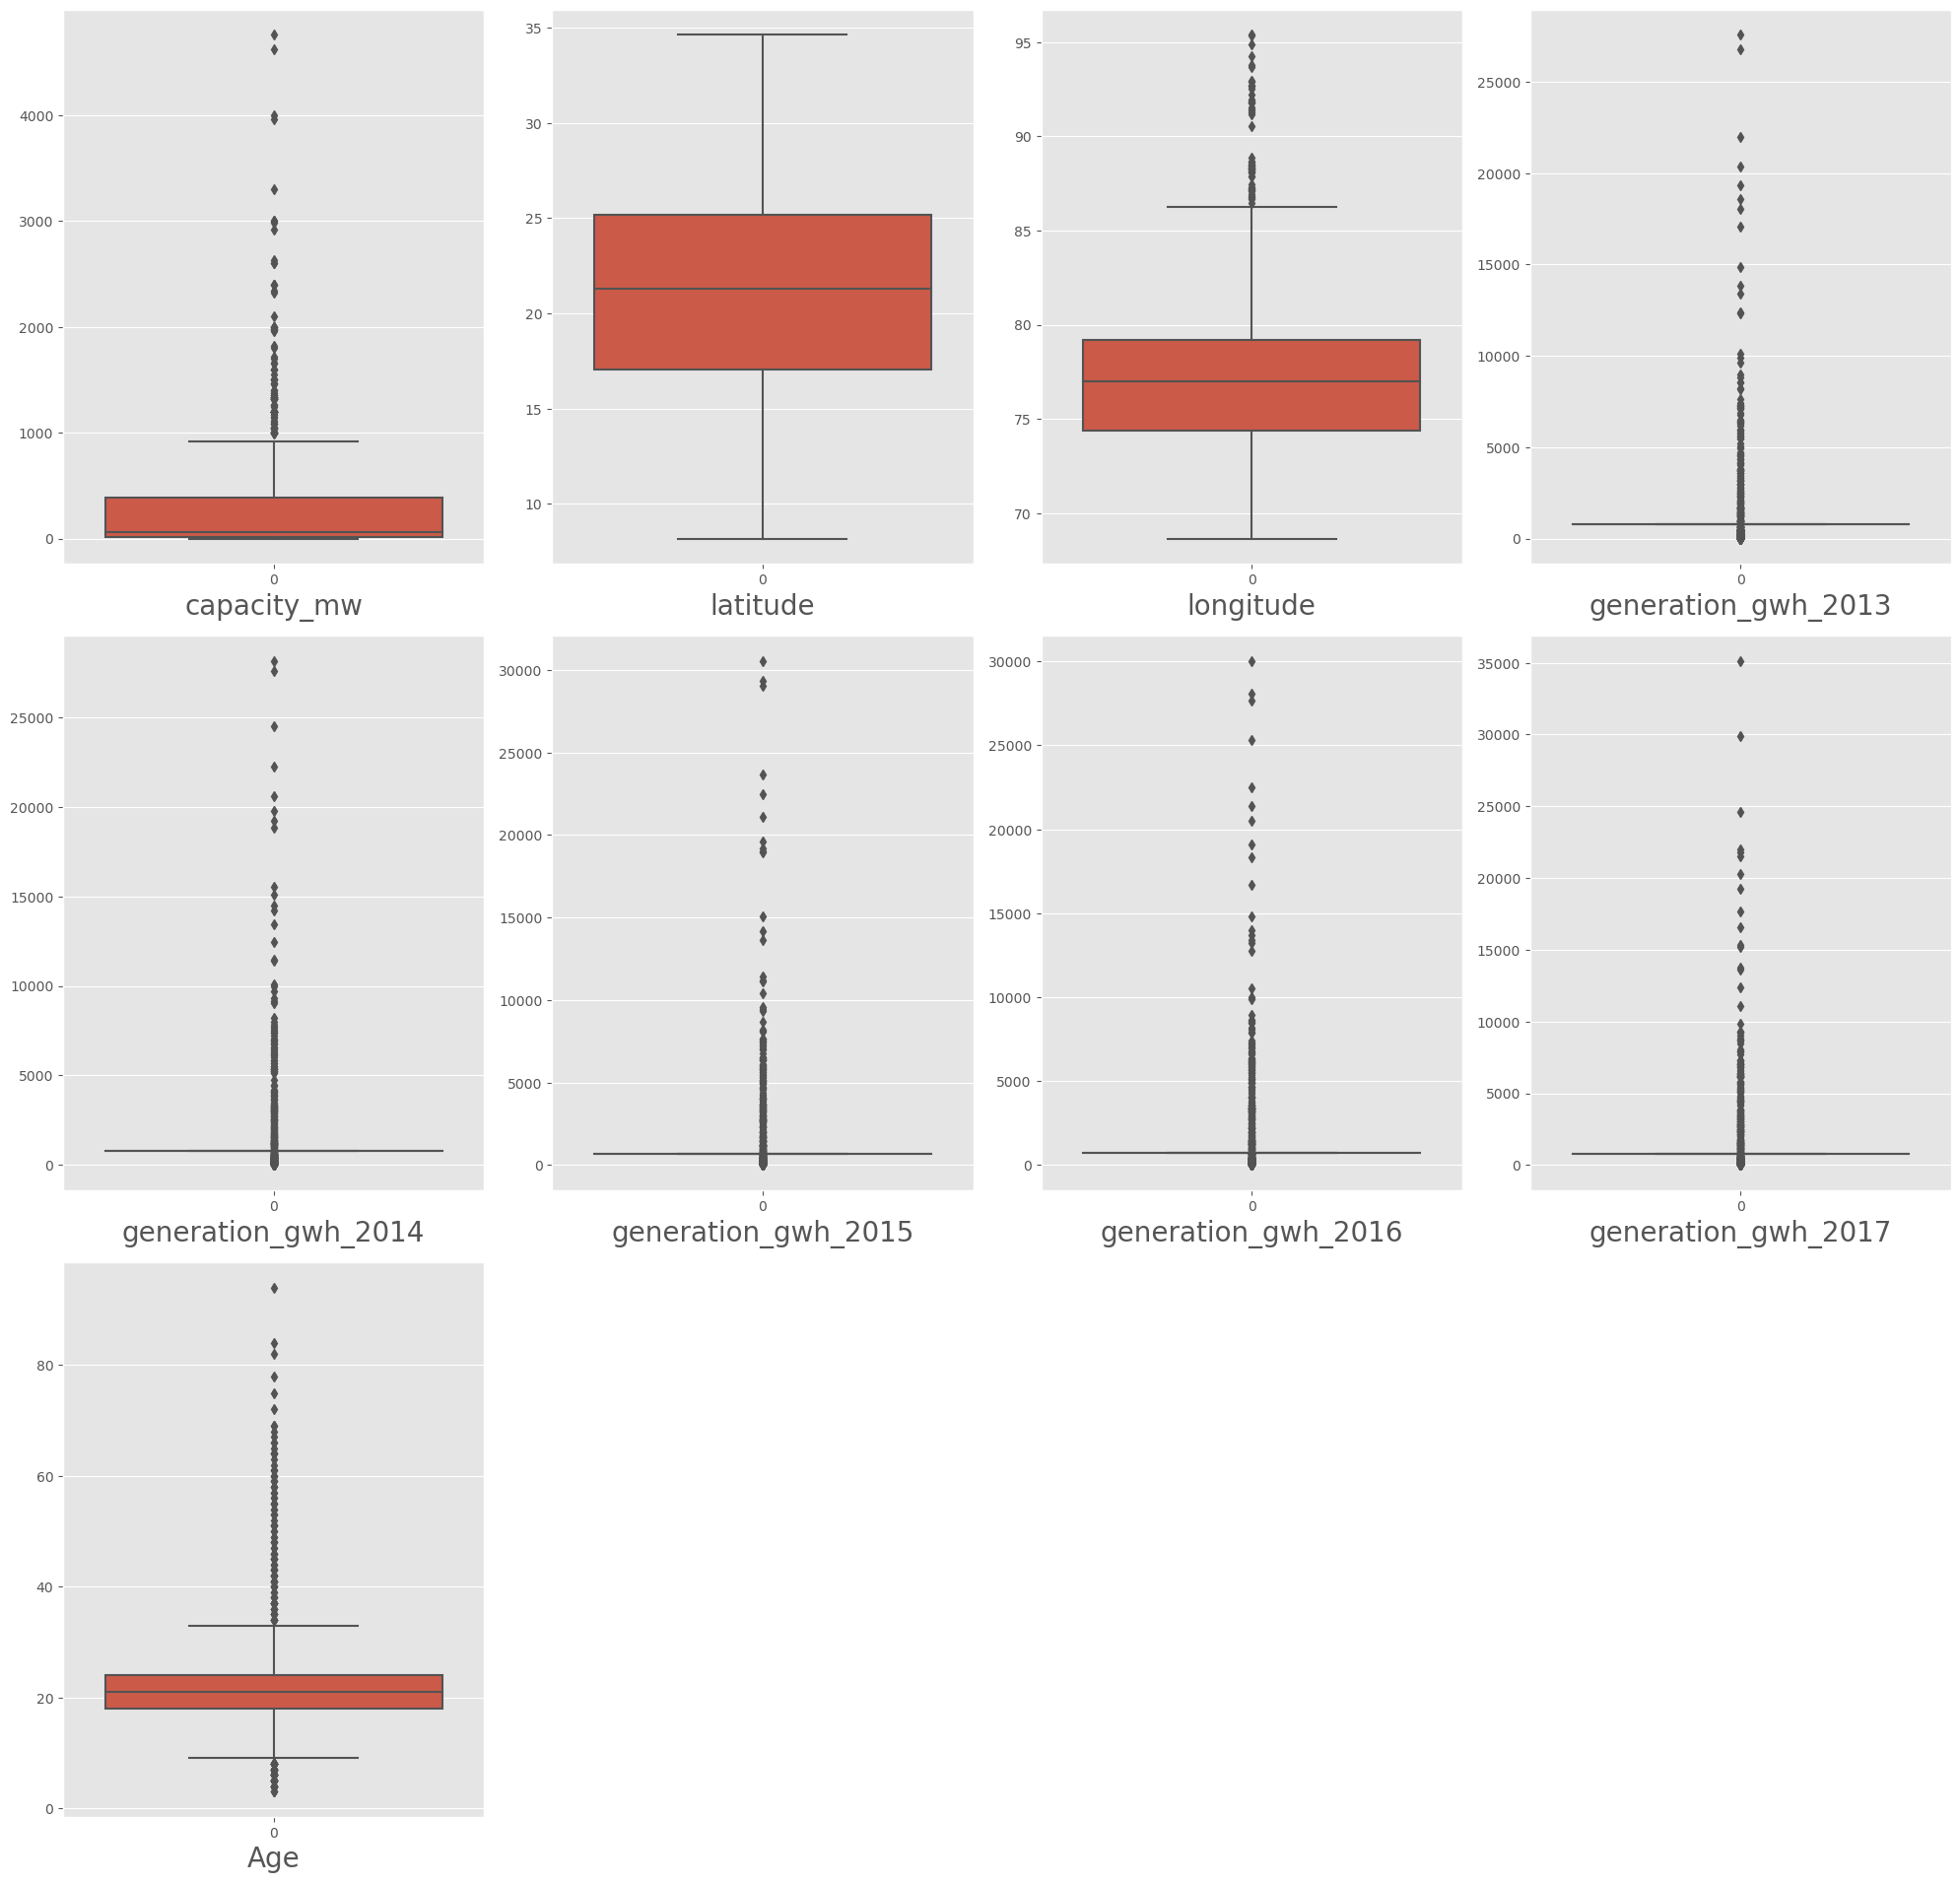

In [162]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = powrDF.drop(columns=['primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()


All columns except latitude have a lot of outliers



In [163]:
df2 = powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()


In [164]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value


In [165]:
df3.shape


(852, 8)

In [166]:
df2.shape


(908, 8)

### % Data loss


In [167]:
loss=(908-852)/908 * 100
loss


6.167400881057269

6.16% Data loss is within acceptable range



In [168]:
dropindx = powrDF.index.difference(df3.index)


In [169]:
powrDF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe


In [170]:
powrDF.shape


(852, 11)

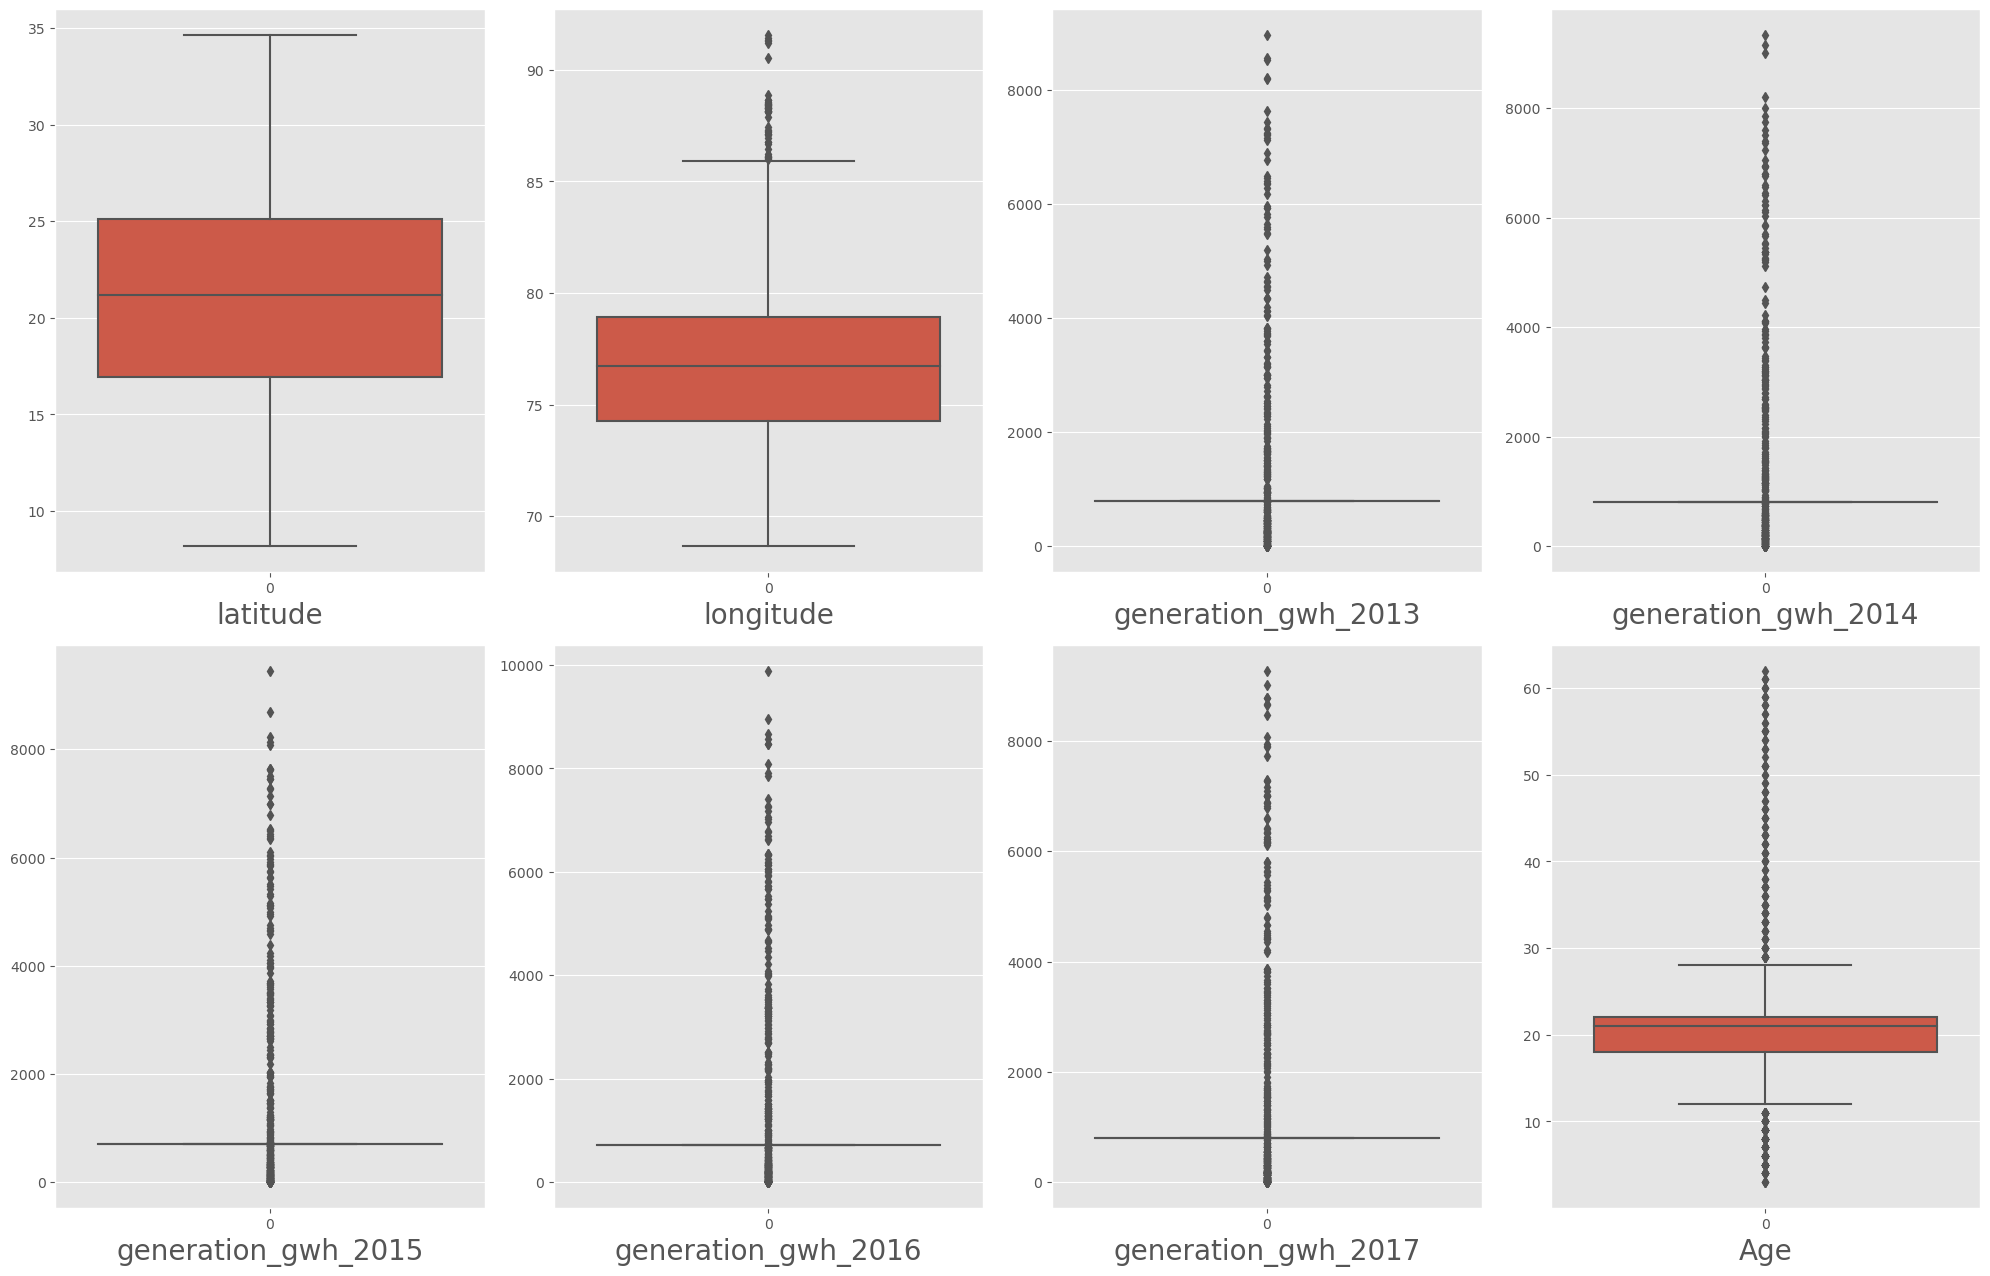

In [171]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()


Some outliers have been removed.



## Checking for Skewness in Data


In [172]:
powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).skew()


latitude              -0.108867
longitude              0.861390
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
Age                    1.209638
dtype: float64

## Skewness exists in all columns except latitude


### Reducing skewness further using PowerTransformer


In [173]:
from sklearn.preprocessing import PowerTransformer


In [174]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)


In [175]:
df4 = powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()


In [176]:
transformed= powtrans.fit_transform(df4)


In [177]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [178]:
transformed.skew()


latitude              -0.068918
longitude              0.000185
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125693
Age                    0.026590
dtype: float64

Skewness has been greatly reduced



In [179]:
transformed.index = powrDF.index


In [180]:
powrDF[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Age']]=transformed[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Age']]


In [181]:
powrDF


,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age
0,2.5,1.163901,-0.932007,Solar,National Renewable Energy Laboratory,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.160220
1,98.0,0.594361,-0.512059,Coal,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
2,39.2,0.120945,-2.360637,Wind,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
3,135.0,0.445952,2.506368,Gas,WRI,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.311572
4,1800.0,0.130255,1.276071,Coal,WRI,0.743909,1.423753,2.285309,2.271019,1.972415,-1.812528
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,-0.795476,0.222976,Coal,WRI,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.010887
904,3.0,-1.342530,0.415127,Solar,Industry About,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
905,25.5,-0.960142,-0.236518,Wind,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
906,80.0,0.525297,-0.771804,Coal,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760


In [182]:
powrDF2 = powrDF.copy()


## Encoding the categorical Feature Columns.


### Encoding using get_dummies()


In [183]:
dumm = pd.get_dummies(powrDF[['geolocation_source','primary_fuel']],drop_first = False)


In [184]:
powrDF2 = powrDF2.join(dumm)


In [185]:
powrDF2.drop(columns = ['geolocation_source','primary_fuel'],axis = 1, inplace = True)


In [186]:
powrDF2


,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,2.5,1.163901,-0.932007,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.160220,0,1,0,0,0,0,0,0,0,1,0
1,98.0,0.594361,-0.512059,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1,0,1,0,0,0,0,0,0
2,39.2,0.120945,-2.360637,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1,0,0,0,0,0,0,0,1
3,135.0,0.445952,2.506368,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.311572,0,0,1,0,0,1,0,0,0,0,0
4,1800.0,0.130255,1.276071,0.743909,1.423753,2.285309,2.271019,1.972415,-1.812528,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,-0.795476,0.222976,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.010887,0,0,1,0,1,0,0,0,0,0,0
904,3.0,-1.342530,0.415127,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,1,0,0,0,0,0,0,0,0,1,0
905,25.5,-0.960142,-0.236518,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1,0,0,0,0,0,0,0,1
906,80.0,0.525297,-0.771804,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1,0,1,0,0,0,0,0,0


## Finding Correlation


In [187]:
t_corr = powrDF2.corr()
t_corr


,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
capacity_mw,1.000000,0.047646,0.264871,0.437067,0.472641,0.529770,0.592951,0.609628,-0.330289,-0.233928,-0.032214,0.236977,-0.145095,0.482836,0.066212,-0.097285,0.164332,-0.065582,-0.240402,-0.226219
latitude,0.047646,1.000000,-0.075132,0.071133,0.107972,0.105058,0.123892,0.103338,-0.095778,0.194798,0.072961,-0.206341,-0.150842,0.055736,-0.068640,0.098074,-0.050774,-0.089913,0.203657,-0.191644
longitude,0.264871,-0.075132,1.000000,0.043394,0.038069,0.038066,0.097417,0.085258,-0.161891,-0.292285,-0.085956,0.305015,-0.057630,0.336133,0.010613,0.142559,-0.014173,-0.051091,-0.297718,-0.249304
generation_gwh_2013,0.437067,0.071133,0.043394,1.000000,0.900625,0.775650,0.729449,0.658863,0.009817,-0.017784,-0.003046,0.018132,-0.011075,0.307972,-0.123188,-0.180546,0.143608,-0.168762,-0.018478,-0.018219
generation_gwh_2014,0.472641,0.107972,0.038069,0.900625,1.000000,0.837628,0.780962,0.709653,-0.040598,-0.018421,-0.003155,0.018782,-0.011471,0.329678,-0.164219,-0.180512,0.157731,-0.167294,-0.019140,-0.018871
generation_gwh_2015,0.529770,0.105058,0.038066,0.775650,0.837628,1.000000,0.881210,0.772441,-0.107826,-0.021209,-0.003633,0.021624,-0.013207,0.338291,-0.098746,-0.201144,0.116281,-0.203248,-0.022036,-0.021728
generation_gwh_2016,0.592951,0.123892,0.097417,0.729449,0.780962,0.881210,1.000000,0.896921,-0.193612,-0.021896,-0.003751,0.022325,-0.013636,0.390060,-0.143816,-0.211305,0.082568,-0.221567,-0.022751,-0.022432
generation_gwh_2017,0.609628,0.103338,0.085258,0.658863,0.709653,0.772441,0.896921,1.000000,-0.179850,-0.015732,-0.002695,0.016040,-0.009797,0.384980,-0.156796,-0.234475,0.079906,-0.152442,-0.016346,-0.016117
Age,-0.330289,-0.095778,-0.161891,0.009817,-0.040598,-0.107826,-0.193612,-0.179850,1.000000,0.032782,-0.098186,-0.013167,0.020415,-0.334356,-0.083025,0.336870,0.039038,0.051068,-0.008627,0.033584
geolocation_source_Industry About,-0.233928,0.194798,-0.292285,-0.017784,-0.018421,-0.021209,-0.021896,-0.015732,0.032782,1.000000,-0.027538,-0.980787,-0.100113,-0.251086,-0.115229,-0.235113,-0.041429,-0.063739,0.962445,-0.164696


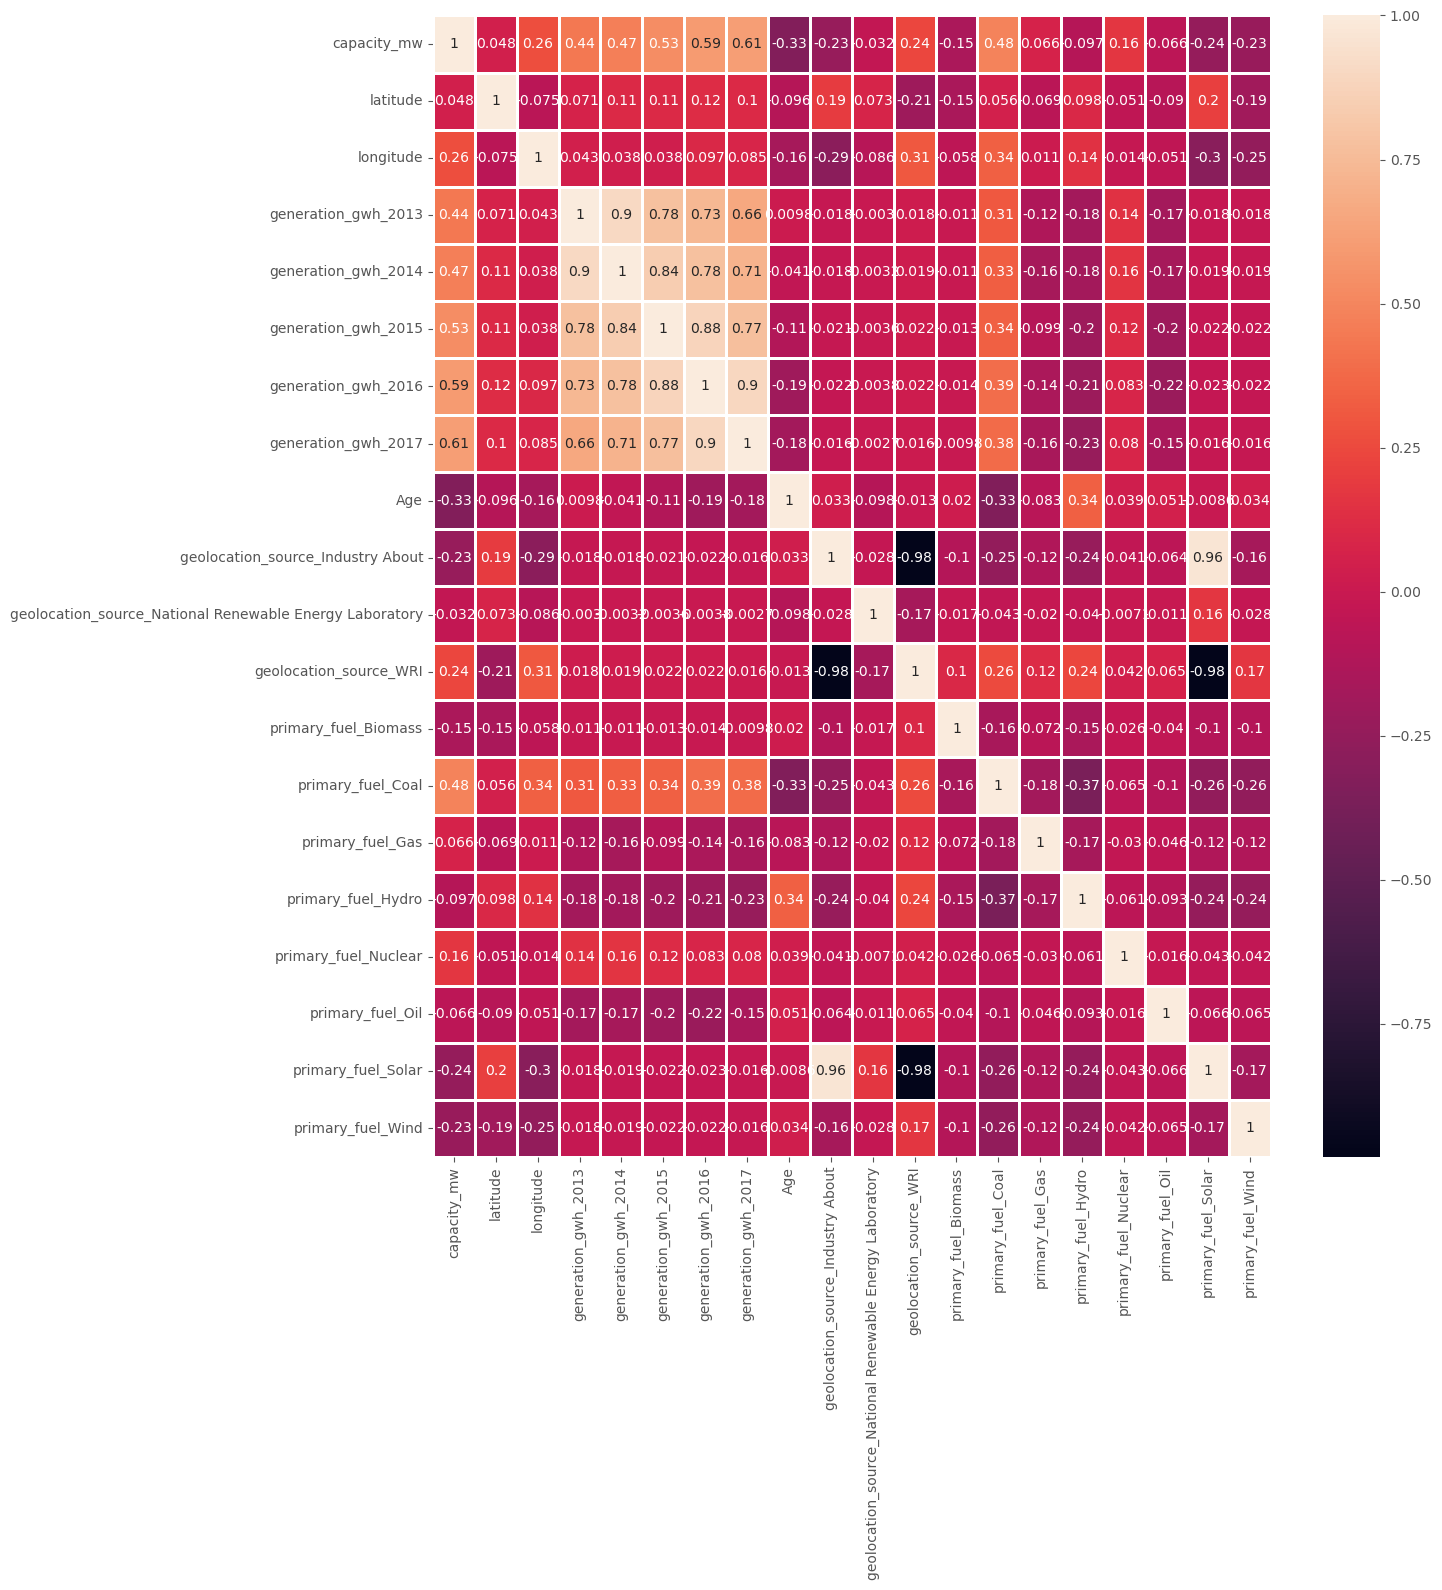

In [188]:
plt.figure(figsize=(15,16))
sns.heatmap(t_corr,annot=True,linewidth=1)
plt.show()


## Visualizing correlation of feature columns with label column.


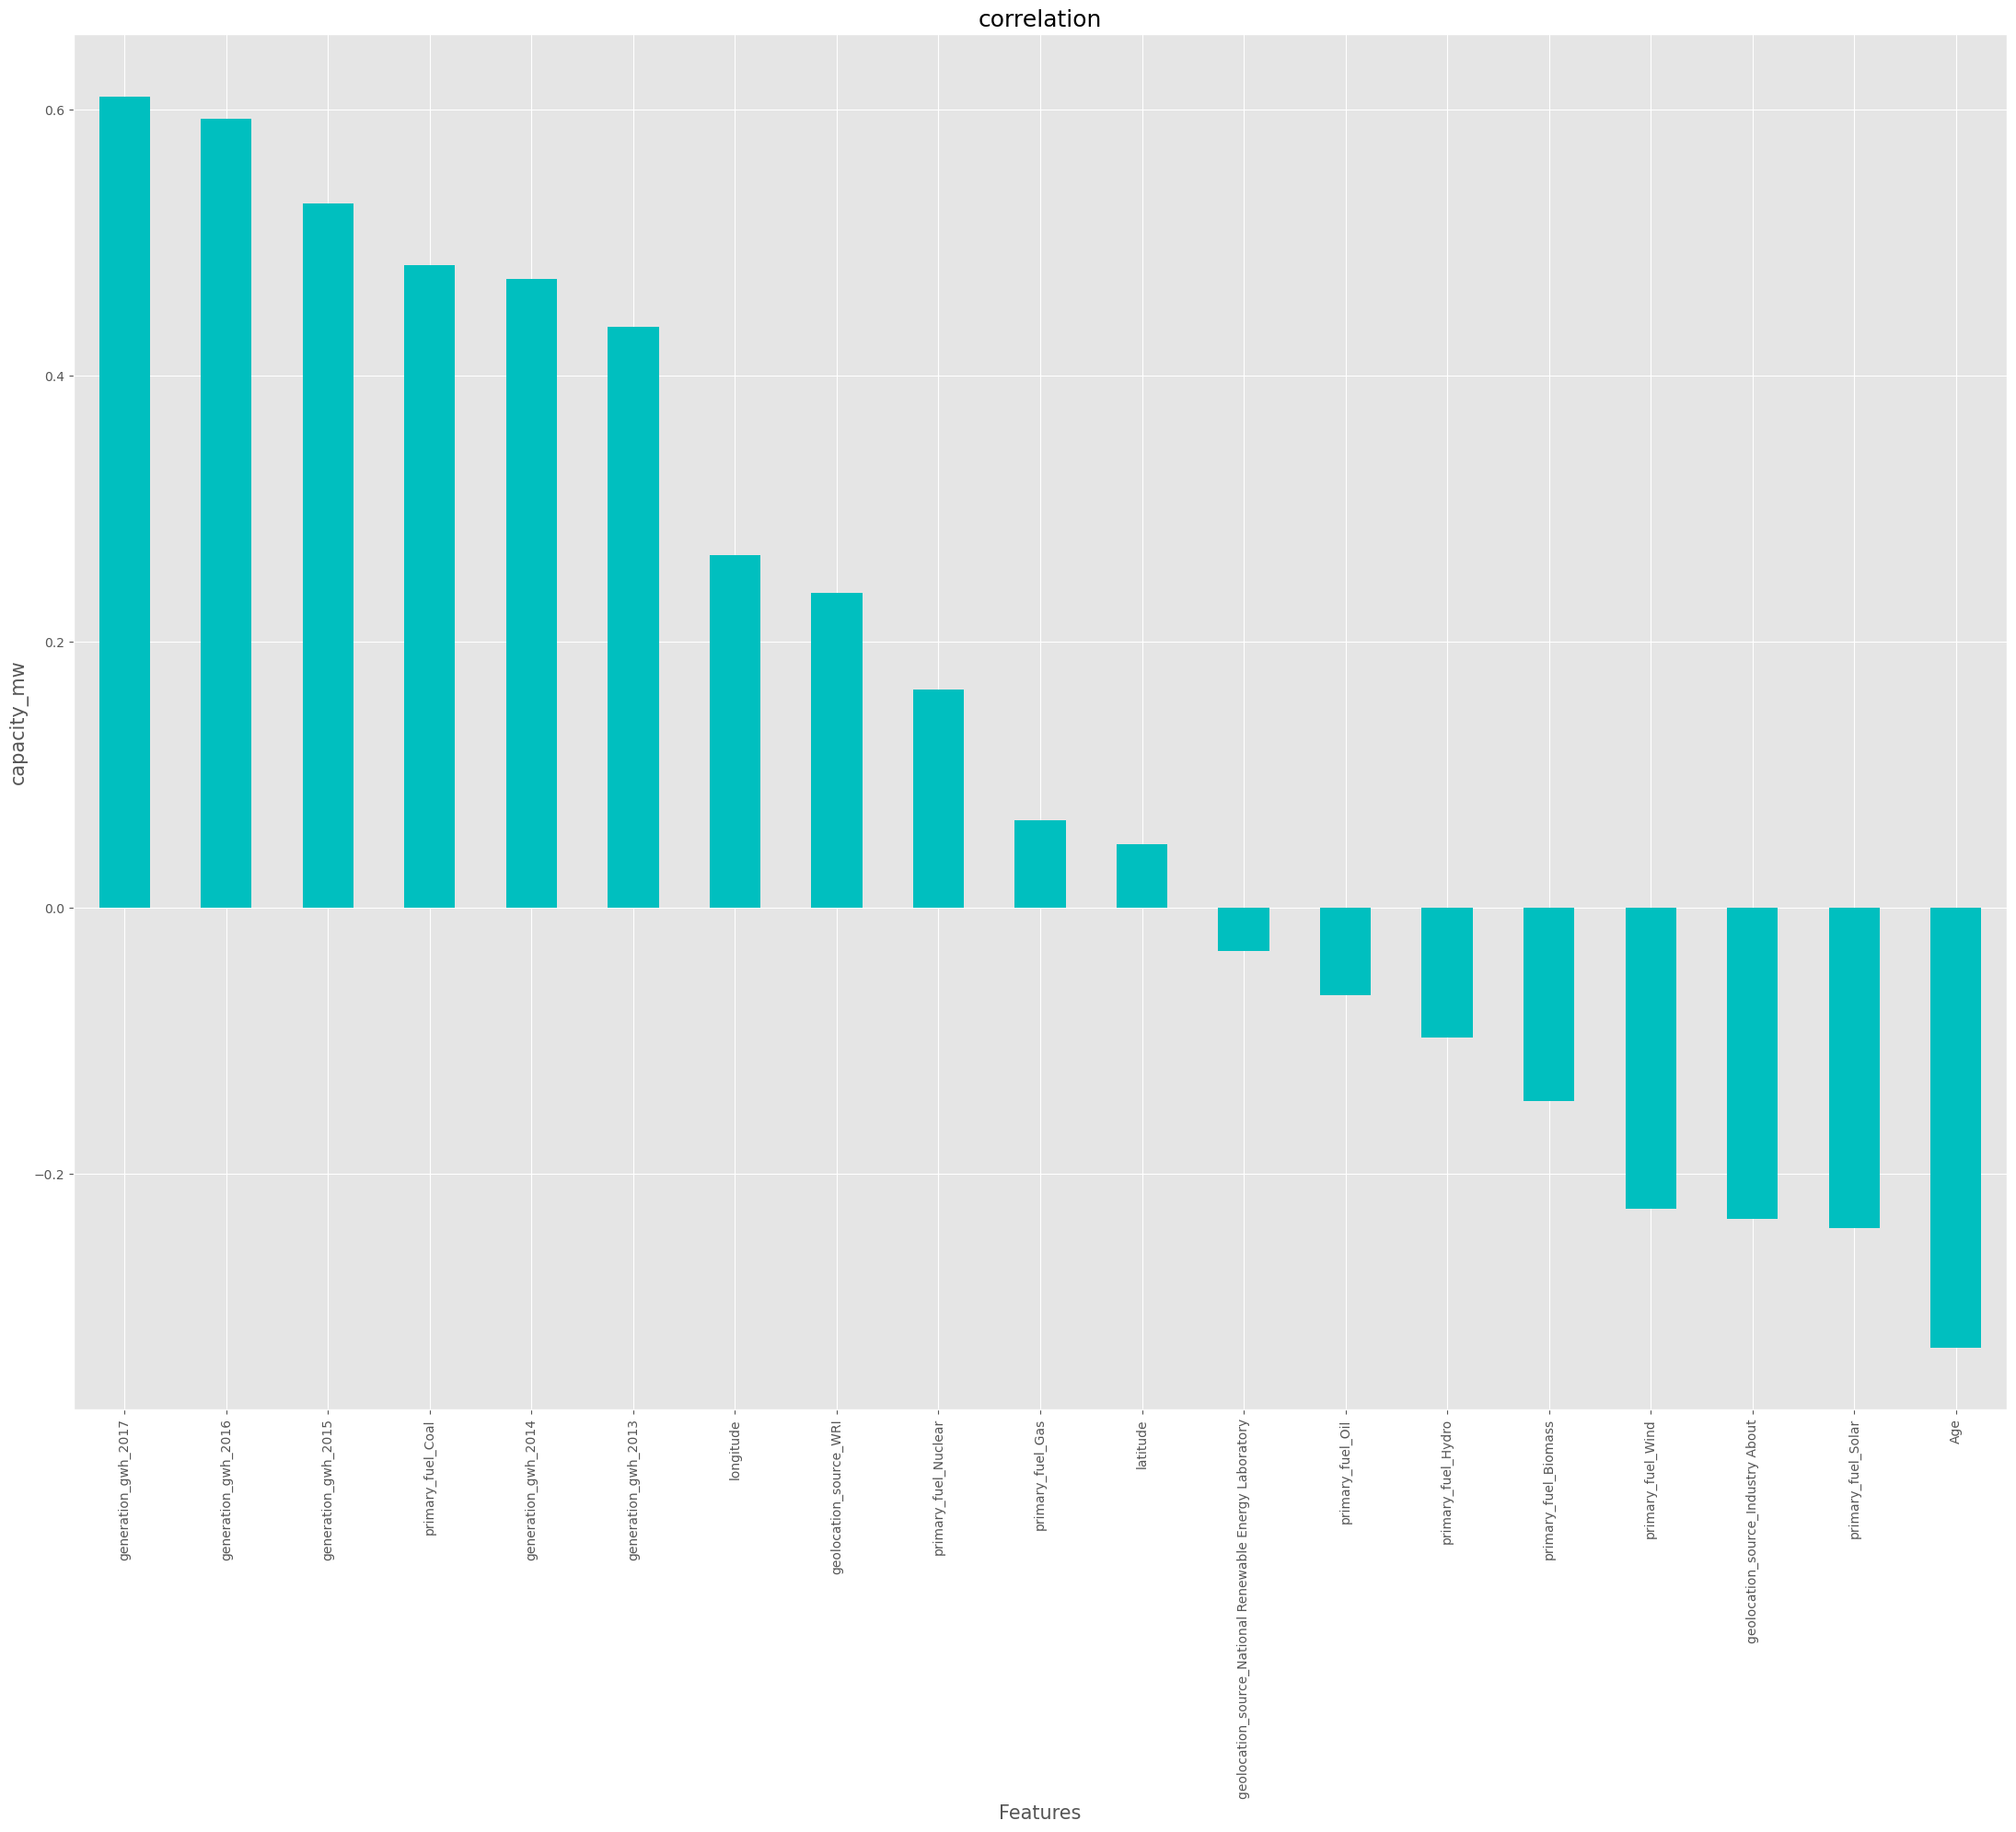

In [189]:
plt.figure(figsize = (22,20))
powrDF2.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()


primary_fuel_Coal,generation_gwh_2017,generation_gwh_2016,Longitude,generation_gwh_2015,geolocation_source_WRI have the highest positive correlation, while Age, Primary_fuel_Solar,geolocation_source_Industry About,Primary_fuel_Wind have the highest negative correlation with capacity_mw



## Feature Selection


In [190]:
from sklearn.preprocessing import StandardScaler


In [191]:
X = powrDF2.drop(columns = ['capacity_mw'])
y = powrDF2['capacity_mw']


In [192]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)


## Checking for Multicollinearity using Variance Inflation Factor


In [193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [194]:
vif = pd.DataFrame()


In [195]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]


In [196]:
vif.head(10)


,Features,vif
0,latitude,1.186063
1,longitude,1.370978
2,generation_gwh_2013,5.544800
3,generation_gwh_2014,7.417128
4,generation_gwh_2015,6.257602
5,generation_gwh_2016,9.921788
6,generation_gwh_2017,5.333128
7,Age,1.391057
8,geolocation_source_Industry About,inf
9,geolocation_source_National Renewable Energy L...,inf


multicollinearity exists amongst generation_gwh_2014,generation_gwh_2015,generation_gwh_2016



## Principle Component Analysis


In [197]:
from sklearn.decomposition import PCA


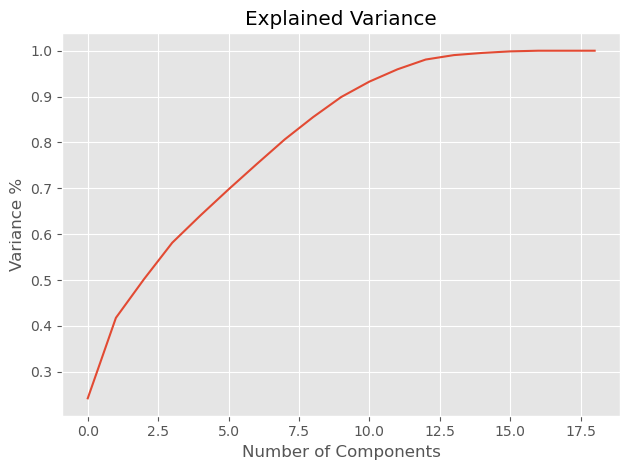

In [198]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()


15 components explain around 95% variance in Data



# Selecting Kbest Features


In [199]:
from sklearn.feature_selection import SelectKBest, f_classif


In [200]:
bestfeat = SelectKBest(score_func = f_classif, k = 19)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


In [201]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(19,'Score'))


                                              Feature     Score
13                                   primary_fuel_Gas  5.618786
6                                 generation_gwh_2017  4.680588
5                                 generation_gwh_2016  4.210302
3                                 generation_gwh_2014  3.364710
18                                  primary_fuel_Wind  3.352449
8                   geolocation_source_Industry About  3.351059
10                             geolocation_source_WRI  3.231852
17                                 primary_fuel_Solar  3.163634
4                                 generation_gwh_2015  3.140176
12                                  primary_fuel_Coal  3.074000
2                                 generation_gwh_2013  3.049878
15                               primary_fuel_Nuclear  2.616195
16                                   primary_fuel_Oil  2.366212
7                                                 Age  2.280104
14                                 prima

## Dropping highly multicollinear column: 'generation_gwh_2016'.


In [202]:
x_best = X.drop(columns=['generation_gwh_2016']).copy()


In [203]:
scaled_x_best = scaler.fit_transform(x_best)


## Target/ Label column ('capacity_mw') has Continuous type of Data.


### Regression Model Building


In [204]:
from sklearn.model_selection import train_test_split


In [205]:
from sklearn.metrics import r2_score


## Finding the Best Random State


In [206]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")


Best Accuracy is: 0.8490485454136266 on random_state: 7


In [207]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state =7)


In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR


In [210]:
from sklearn.metrics import r2_score,mean_squared_error


In [212]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
SV= SVR()
r=Ridge()


## Training the Models


In [213]:
rf.fit(x_train,y_train)

SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)


DecisionTreeRegressor()

All models have been trained.



## Ridge Regression Model


In [214]:
y_r_pred = r.predict(x_test)
r2_score(y_test,y_r_pred)


0.6230497783850051

In [215]:
mean_squared_error(y_test,y_r_pred)


63210.37909174156

In [216]:
np.sqrt(mean_squared_error(y_test,y_r_pred))


251.41674385716948

## Random Forest Regression Model


In [217]:
y_rf_pred = rf.predict(x_test)
r2_score(y_test,y_rf_pred)


0.8506802147867497

In [218]:
mean_squared_error(y_test,y_rf_pred)


25039.27491749089

In [219]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))


158.2380324621451

## Support Vector Regression Model


In [220]:
y_svr_pred = SV.predict(x_test)
r2_score(y_test,y_svr_pred)


-0.15821627907857727

In [221]:
mean_squared_error(y_test,y_svr_pred)


194220.0478278506

In [222]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))


440.7040365459007

## Decision Tree Regression Model


In [223]:
y_dt_pred = dt.predict(x_test)
r2_score(y_test,y_dt_pred)


0.6604896681137825

In [224]:
mean_squared_error(y_test,y_dt_pred)


56932.12406706038

In [225]:
np.sqrt(mean_squared_error(y_test,y_dt_pred))


238.6045348836865

## Model Cross Validation


In [226]:
from sklearn.model_selection import ShuffleSplit,cross_val_score


## Ridge Regression



In [227]:
cross_val_score(r,scaled_x_best,y,cv=5).mean()


0.5651198230357517

## Random Forest Regression


In [228]:
cross_val_score(rf,scaled_x_best,y,cv=5).mean()


0.7693891603108517

## SVR Regression


In [229]:
cross_val_score(SV,scaled_x_best,y,cv=5).mean()


-0.14661601777982197

##  Decision Tree Regression


In [230]:
cross_val_score(dt,scaled_x_best,y,cv=5).mean()


0.5632886488888006

### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score


## Hyper Parameter Tuning


# Random Forest Regressor


In [231]:
parameter = {'n_estimators':[30,60,80,100],'max_depth': [10,20,40,60],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10,20],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}


In [232]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)
